## 첫 번째 애플리케이션: 붓꽃의 품종 분류

### (1)데이터 적재

In [26]:
import numpy as np
import matplotlib as plt
import pandas as pd
import mglearn

In [27]:
#iris data set LOAD
from sklearn.datasets import load_iris
iris_dataset = load_iris()

#iris_dataset은 key-value로 구성된 dictionary 와 유사한 bounch class
# dataset key값 확인
print("iris_dataset의 key: {}".format(iris_dataset.keys()))

#'DESCR' key의  value 확인
print(iris_dataset['DESCR'][:193] + "\n...")

print("타깃의 이름: {}".format(iris_dataset['target_names']))
print("특성의 이름: {}".format(iris_dataset['feature_names']))
print("data의 타입: {}".format(type(iris_dataset['data'])))
print("data의 크기: {}".format(iris_dataset['data'].shape))
print("data의 처음 다섯 행:\n{}".format(iris_dataset['data'][:5]))
print("target의 타입: {}".format(type(iris_dataset['target'])))
print("타깃:\n{}".format(iris_dataset['target']))


iris_dataset의 key: dict_keys(['feature_names', 'target', 'target_names', 'filename', 'DESCR', 'data'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...
타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
data의 타입: <class 'numpy.ndarray'>
data의 크기: (150, 4)
data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
target의 타입: <class 'numpy.ndarray'>
타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### (2) 테스트 디자인 : 훈련 데이터와 테스트 데이터 준비

In [38]:
from sklearn.model_selection import train_test_split

#trin 75%, test 25%
# X 입력 데이터 2차원, y 출력레이블 1차원
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], train_size=100, test_size=50, random_state=1)

print("X_train 크기: {}".format(X_train.shape))
print("y_train 크기: {}".format(y_train.shape))

print("X_test 크기: {}".format(X_test.shape))
print("y_test 크기: {}".format(y_test.shape))
print(y_test)



X_train 크기: (100, 4)
y_train 크기: (100,)
X_test 크기: (50, 4)
y_test 크기: (50,)
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1 2 0 0 0 1]


### (3) 데이터 준비

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000157BAB62F60>,
      dtype=object)

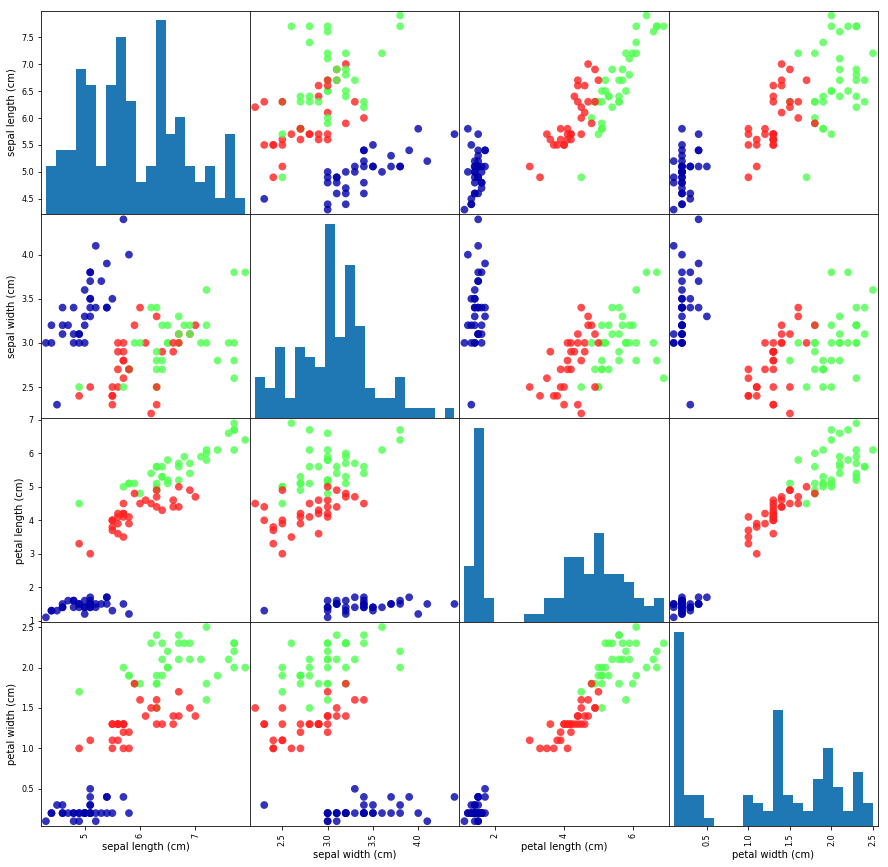

In [29]:
# X_train 데이터를 사용해서 데이터프레임을 만듭니다.
# 열의 이름은 iris_dataset.feature_names에 있는 문자열을 사용합니다.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
                           hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3)


### (3) Modeling (k-최근접 이웃 알고리즘)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

### (4) 예측하기

In [31]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape: {}".format(X_new.shape))

prediction = knn.predict(X_new)
print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
       iris_dataset['target_names'][prediction]))


X_new.shape: (1, 4)
예측: [0]
예측한 타깃의 이름: ['setosa']


### (5)모델 평가하기

In [32]:
y_pred = knn.predict(X_test)
print("테스트 세트에 대한 출력값:\n {}".format(y_test))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))


테스트 세트에 대한 출력값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1 1 1 2 0 2 0 0 1 2 2 2 2]
테스트 세트에 대한 예측값:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0 1 2 2 1 2]
테스트 세트의 정확도: 0.96
테스트 세트의 정확도: 0.96


In [21]:
import random

test = iris_dataset['data']

random.shuffle(test)

batch_1 = test[0:10:]
batch_2 = test[10:60:]
batch_3 = test[50:150:]

print(batch_1.shape)
print(batch_2.shape)
print(batch_3.shape)

prediction = knn.predict(batch_3)

print("예측: {}".format(prediction))
print("예측한 타깃의 이름: {}".format(
       iris_dataset['target_names'][prediction]))

y_pred = knn.predict(X_test)

print("테스트 세트에 대한 출력값:\n {}".format(y_test))
print("테스트 세트에 대한 예측값:\n {}".format(y_pred))

print("테스트 세트의 정확도: {:.2f}".format(np.mean(y_pred == y_test)))

print("테스트 세트의 정확도: {:.2f}".format(knn.score(X_test, y_test)))

(10, 4)
(50, 4)
(100, 4)
예측: [0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 1 0 0 2
 1 1 1 2 1 1 2 0 0 1 0 2 0 0 1 1 1 1 2 0 1 2 1 0 0 2]
예측한 타깃의 이름: ['setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'setosa' 'versicolor' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor' 'versicolor'
 'setosa' 'setosa' 'versicolor' 'versicolor' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'setosa' 'versicolor'
 'setosa' 'versicolor' 'setosa' 'setosa' 'versicolor' 'seto

In [23]:
test

array([[5.1, 3.5, 1.4, 0.2],
       [5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 3.5, 1.4, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [4.8, 3. , 1.4, 0.1],
       [5.4, 3.4, 1.7, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.6, 3.4, 1.4, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.7, 4.4, 1.5, 0.4],
       [4.7, 3.2, 1.3, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [4.7, 3.2, 1.6, 0.2],
       [5.2, 3